<a href="https://colab.research.google.com/github/opoluliakh/data-analytics-learning/blob/main/Poluliakh_HW3_%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%BD%D1%96_%D0%B2%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%97_%D0%B7_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Завантаження даних
df = pd.read_csv('yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour


---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [8]:
df['month_year'] = df.index.to_period('M')
df['month_year']  = df.month_year.astype(str)

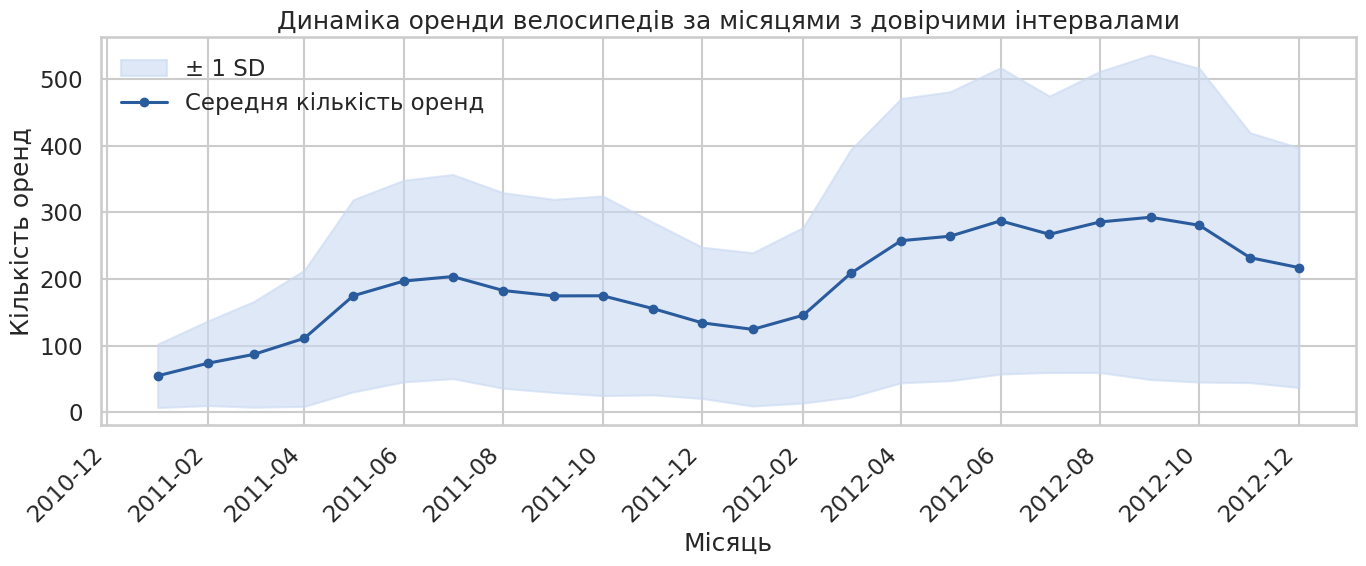

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates


monthly = (df.groupby('month_year_dt')['count']
             .agg(mean='mean', sd='std')
             .reset_index()
             .fillna({'sd': 0}))

sns.set_theme(style='whitegrid', context='talk')
fig, ax = plt.subplots(figsize=(14, 6))

ax.fill_between(
    monthly['month_year_dt'],
    monthly['mean'] - monthly['sd'],
    monthly['mean'] + monthly['sd'],
    color='#c9d9f2', alpha=0.6, label='± 1 SD'
)

ax.plot(
    monthly['month_year_dt'], monthly['mean'],
    color='#2a5b9d', marker='o', linewidth=2.2, markersize=6,
    label='Середня кількість оренд'
)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

ax.set_title('Динаміка оренди велосипедів за місяцями з довірчими інтервалами')
ax.set_xlabel('Місяць')
ax.set_ylabel('Кількість оренд')
ax.legend(loc='upper left', frameon=False)
plt.tight_layout()
plt.show()


Найбільша невизначеність (широкий синій діапазон) спостерігається у літні місяці (червень–серпень 2012 року). Це пояснюється тим, що влітку попит дуже залежить від погодних умов: сонячні дні дають пікові оренди, дощові — майже нульові.  Зимові місяці (грудень–лютий) мають низькі значення оренд, але також невелику варіативність, тому невизначеність тут менша. Весна й осінь — перехідні періоди: оренди зростають або падають, але коливання ще не такі сильні, як у пік сезону.

## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами - з Pandas та Seaborn - та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної. В візуалізації Seaborn додайте параметр при побудові `kde=True`.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

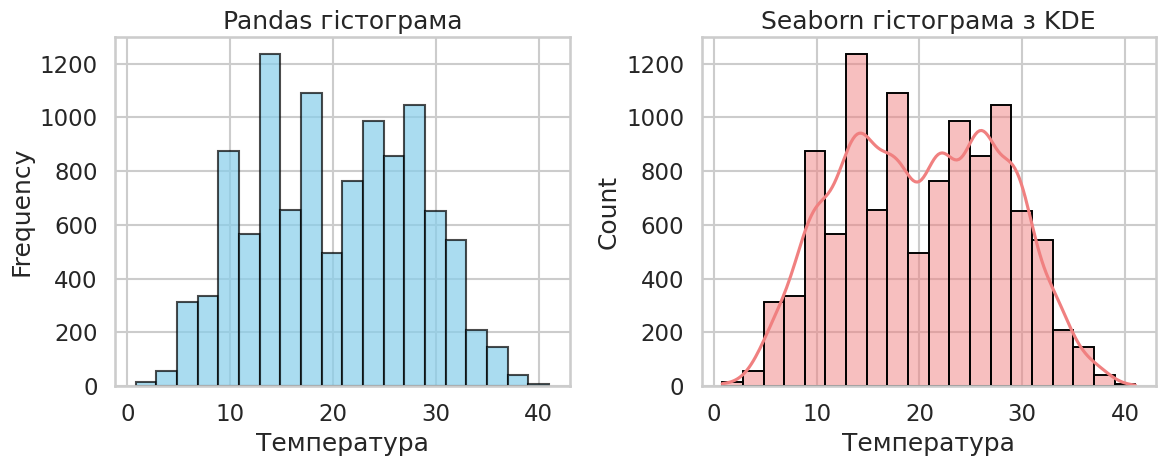

In [12]:
bins = 20

plt.figure(figsize=(12,5))

# --- Pandas гістограма ---
plt.subplot(1,2,1)
df["temp"].plot.hist(bins=bins, alpha=0.7, color="skyblue", edgecolor="black")
plt.title("Pandas гістограма")
plt.xlabel("Температура")

# --- Seaborn гістограма ---
plt.subplot(1,2,2)
sns.histplot(df["temp"], bins=bins, kde=True, color="lightcoral", edgecolor="black")
plt.title("Seaborn гістограма з KDE")
plt.xlabel("Температура")

plt.tight_layout()
plt.show()


**Яка візуальна різниця між Pandas та Seaborn гістограмами?** Pandas показує простий графік без додаткових елементів. Seaborn дає більш естетичний вигляд та додаткові можливості (наприклад, KDE).

**Що за лінія додаткова на графіку в Seaborn?** Це лінія KDE (Kernel Density Estimate).Вона відображає оцінку щільності розподілу, тобто «ймовірність зустріти певне значення», згладжену криву замість дискретних стовпчиків.

## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

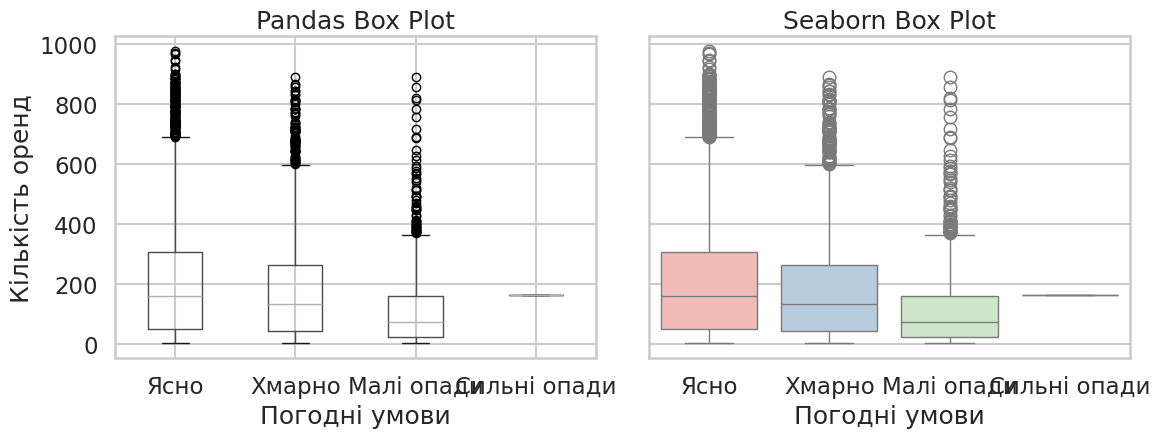

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) мапа погодних умов
weather_map = {
    1: 'Ясно',
    2: 'Хмарно',
    3: 'Малі опади',
    4: 'Сильні опади'
}

# 2) датафрейм для побудови
df_plot = df[['weather', 'count']].dropna().copy()
df_plot['weather'] = df_plot['weather'].astype(int).map(weather_map)

# 3) фіксований порядок категорій (однаковий для Pandas і Seaborn)
order = ['Ясно', 'Хмарно', 'Малі опади', 'Сильні опади']
df_plot['weather'] = pd.Categorical(df_plot['weather'],
                                    categories=order, ordered=True)

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# --- Pandas boxplot (порядок береться з категорійного типу)
df_plot.boxplot(column='count', by='weather', ax=axes[0])
axes[0].set_title("Pandas Box Plot")
axes[0].set_xlabel("Погодні умови")
axes[0].set_ylabel("Кількість оренд")
fig.suptitle("")     # прибираємо зайвий заголовок Pandas

# --- Seaborn boxplot БЕЗ попередження:
#     додаємо hue=weather (той самий, що x), вимикаємо рознесення та легенду
sns.boxplot(
    x='weather', y='count', hue='weather', data=df_plot,
    order=order, dodge=False, legend=False, palette='Pastel1', ax=axes[1]
)
axes[1].set_title("Seaborn Box Plot")
axes[1].set_xlabel("Погодні умови")
axes[1].set_ylabel("Кількість оренд")

plt.tight_layout()
plt.show()


Візуальна різниця між Pandas та Seaborn box plot полягає у вигляді графіка:

Pandas Box Plot (зліва) – більш базовий, чорно-білий, без додаткового форматування. Він показує основну статистику (медіану, квартилі, «вуса» та викиди), але виглядає «сухо» й менш виразно.

Seaborn Box Plot (справа) – має кольорове оформлення, більш естетичний дизайн і автоматично застосовує стиль бібліотеки. Він легше читається, наочно підкреслює відмінності між групами і краще підходить для презентацій.

<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


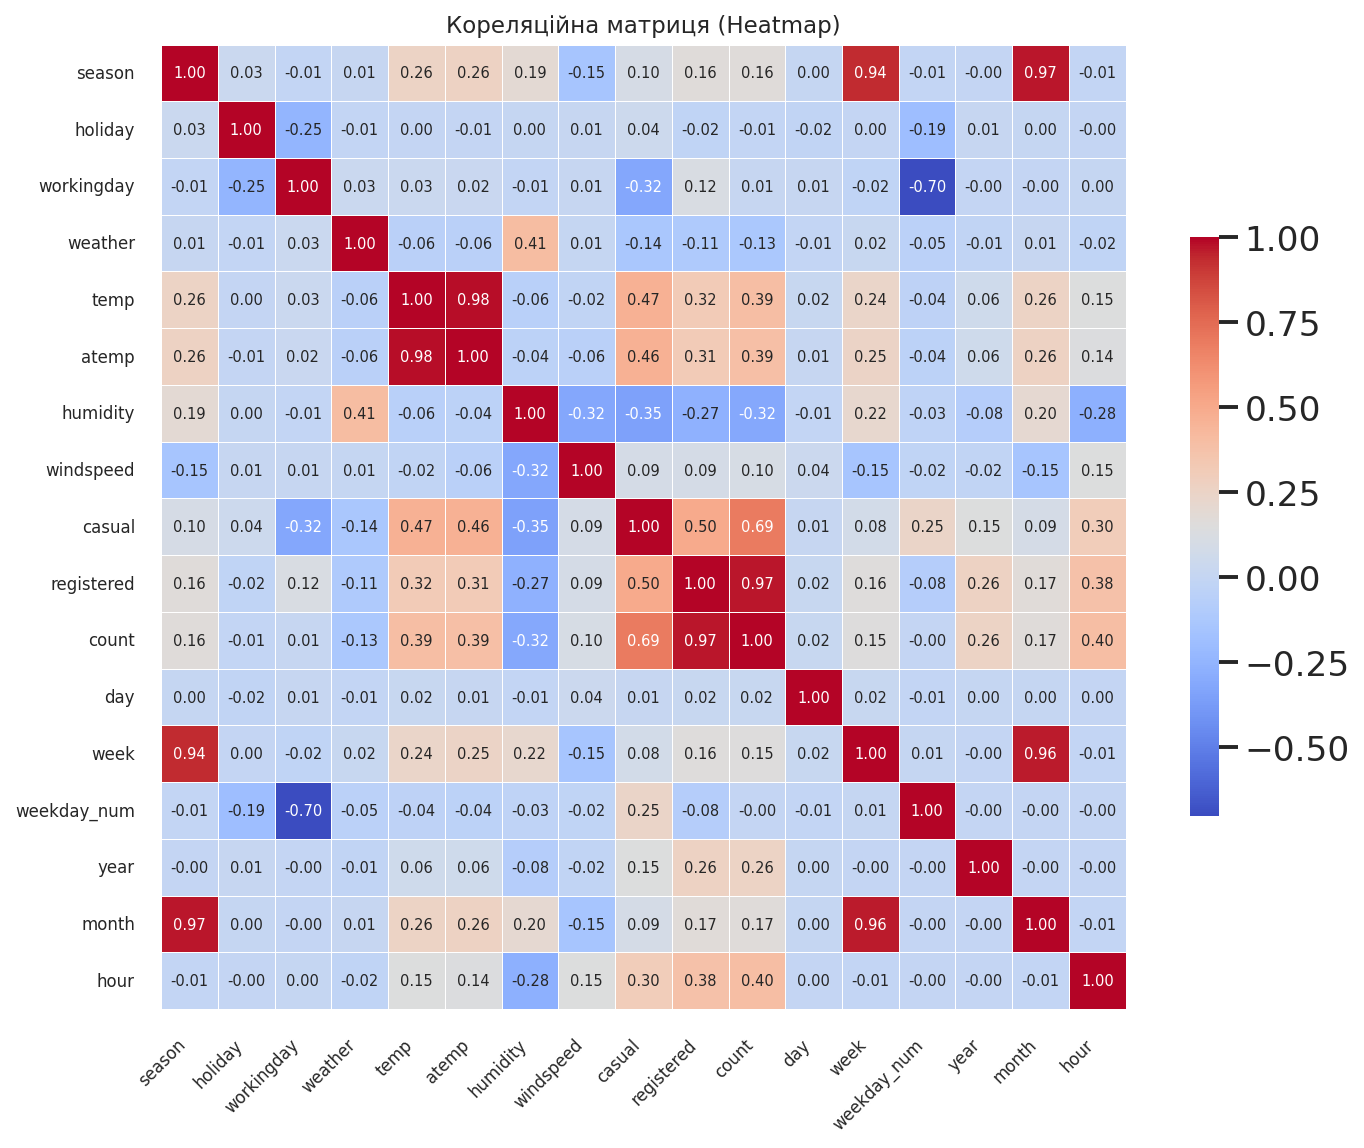

In [27]:

num_df = df.select_dtypes(include=[np.number])

corr = num_df.corr()

fig, ax = plt.subplots(figsize=(10, 8), dpi=150)

sns.heatmap(
    corr,
    annot=True, fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"shrink": .6},
    annot_kws={"size": 7},
    linewidths=.4, linecolor="white",
    square=True, ax=ax
)

ax.set_title("Кореляційна матриця (Heatmap)", fontsize=11)
ax.tick_params(axis="both", labelsize=8)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
Найсильніший зв’язок спостерігається з кількістю зареєстрованих користувачів (registered, кореляція 0.97). Досить висока кореляція є також з тимчасовими користувачами (casual, 0.69). Помірну позитивну кореляцію з count мають температура (temp, atemp) та година доби (hour).

Яка кореляція між temp та atemp? Чому?
Кореляція між температурою (temp) і відчутною температурою (atemp) становить 0.98, що майже дорівнює ідеальній залежності. Це логічно, адже показник atemp розраховується на основі фактичної температури з урахуванням вологості та вітру, тому обидві змінні тісно пов’язані.

Які змінні мають негативну кореляцію?
Найпомітніше від’ємне значення спостерігається між кількістю оренд та такими змінними, як вологість (humidity, -0.32) і швидкість вітру (windspeed, -0.32). Це означає, що несприятливі погодні умови знижують кількість поїздок. Також сильна технічна негативна кореляція є між календарними змінними (weekday_num і workingday, -0.70).

## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за сезонами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому сезоні найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


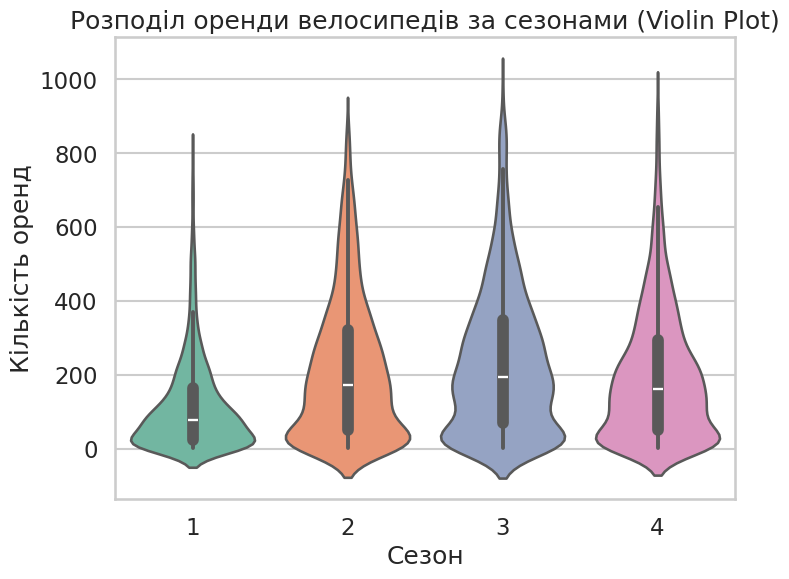

In [29]:
plt.figure(figsize=(8,6))
sns.violinplot(x="season", y="count", hue="season", data=df, palette="Set2", legend=False)

plt.title("Розподіл оренди велосипедів за сезонами (Violin Plot)")
plt.xlabel("Сезон")
plt.ylabel("Кількість оренд")
plt.show()


**Що показує "товщина" violin plot? **Товщина (ширина) ділянки відображає щільність даних у цьому діапазоні. Чим ширше "тіло" скрипки, тим більше спостережень (велика концентрація значень) у цьому інтервалі. Вузькі ділянки означають, що там мало даних.

**В якому сезоні найбільша варіабельність оренди? **Найбільша варіабельність (розкид) спостерігається у літній сезон (3) — там розподіл широкий і тягнеться до найвищих значень (близько 1000 оренд). Також високий розкид видно у весняному сезоні (2). Натомість у зимовому сезоні (1) дані скупчені в нижніх значеннях, варіабельність найменша.

**Яка перевага violin plot над звичайним box plot? **Box plot показує лише основні статистики (медіану, квартилі, викиди). Violin plot поєднує box plot + kernel density estimation → тобто дає повну картину розподілу даних. Завдяки формі можна побачити множинні піки (наприклад, якщо розподіл має кілька мод). Це неможливо у звичайному box plot.

## Завдання 6: Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте сезон.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше змінюється від сезону?

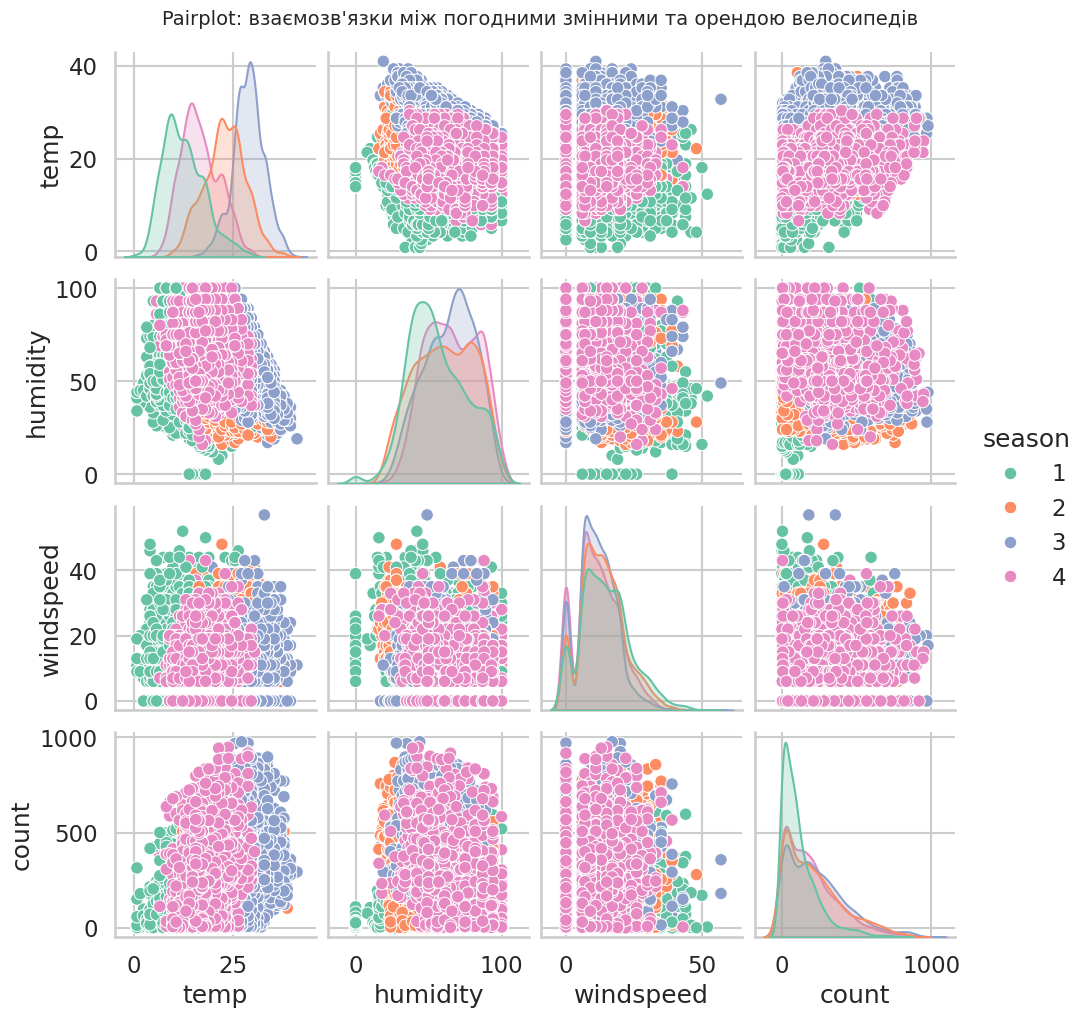

In [31]:
sns.pairplot(
    df,
    vars=['temp', 'humidity', 'windspeed', 'count'],
    hue='season',
    palette='Set2',
    diag_kind='kde'
)
plt.suptitle("Pairplot: взаємозв'язки між погодними змінними та орендою велосипедів",
             y=1.02, fontsize=14)
plt.show()


**Між якими змінними спостерігається найсильніший лінійний зв'язок?**
Найсильніший позитивний лінійний зв'язок видно між температурою (temp) і кількістю оренд (count). Чим тепліше, тим більше беруть велосипеди в оренду, і ця залежність досить чітка. Взаємозв'язки між іншими змінними (наприклад, вологість–кількість чи вітер–кількість) виглядають слабшими й більш розсіяними.

**Яка характеристика найбільше змінюється від сезону?**
Найбільше від сезону змінюється температура (temp). На діагоналі видно чіткі піки розподілу: найнижчі значення — у 1-му сезоні (зима), найвищі — у 3-му (літо), а весна та осінь займають проміжне місце. Вологість і швидкість вітру залежать від сезону значно менше.

## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

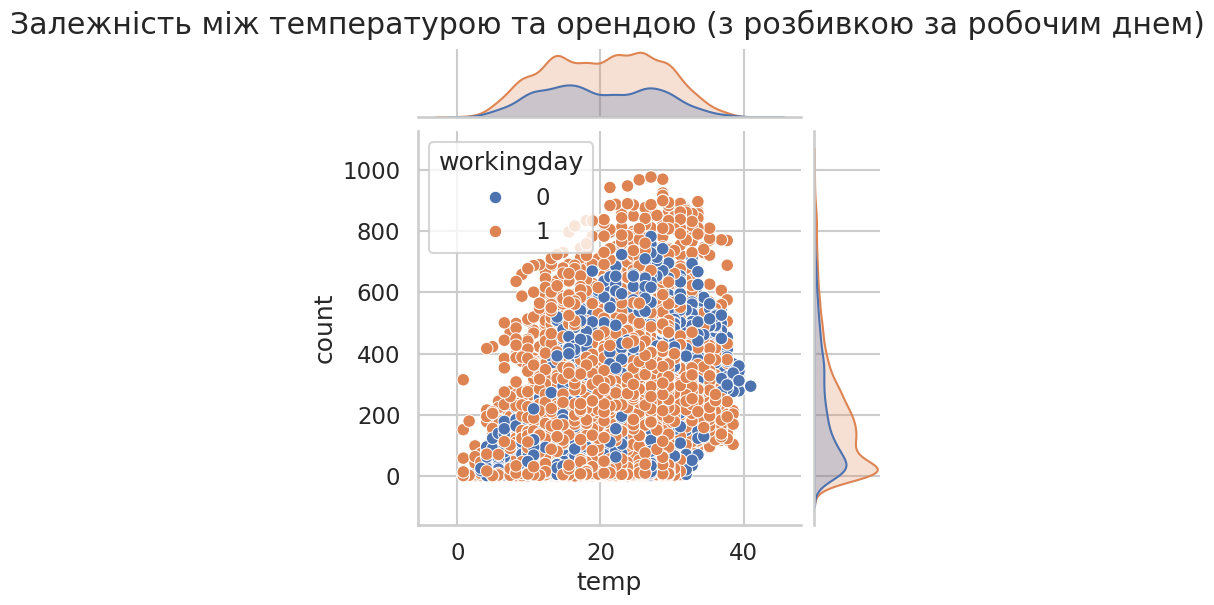

In [32]:

sns.jointplot(
    data=df,
    x="temp",
    y="count",
    hue="workingday",     # 0 = вихідний, 1 = робочий день
    kind="scatter",
    height=6
)

plt.suptitle("Залежність між температурою та орендою (з розбивкою за робочим днем)", y=1.02)
plt.show()


**Що показують графіки по краях?**
Гістограми та щільності по краях відображають розподіл окремих змінних. Зверху — як розподіляється температура, праворуч — як розподіляється кількість оренд. Це дозволяє побачити, при яких температурах і з якою частотою відбувається найбільше оренд.

**Чи є різниця у поведінці користувачів у робочий і неробочий день?**
Так, є. У робочі дні (помаранчевий) кількість оренд вища при тій самій температурі, тоді як у вихідні (синій) попит більш рівномірний і без різко виражених піків. Це свідчить про те, що велосипеди у будні частіше використовують як транспорт, а у вихідні — для відпочинку.